![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

Stakeholder = real estate broker and their clients seeking to sell

Buisiness Problem = what elements of a house are going to increase price

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [1]:
# code here to explore your data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.formula.api import ols
%matplotlib inline



In [6]:
!ls

GIS_data
GIS_data.ipynb
Project2AlexM.ipynb
Train_Test_Split.ipynb
data
distance_function.py


In [3]:
df_train_x = pd.read_csv('../../data/kc_house_data_xtrain_FINAL.csv')
df_train_y = pd.read_csv('../../data/kc_house_data_ytrain_FINAL.csv')

,Unnamed: 0,price
0,3902,725000.0
1,18189,293000.0
2,13416,306000.0
3,13337,480000.0
4,4154,371000.0


In [7]:
df_train_x.head()

,Unnamed: 0,Unnamed: 0.1,index,Unnamed: 0.1.1,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,x0_6 Low Average,x0_7 Average,x0_8 Good,x0_9 Better,x0_Average,x0_Fair,x0_Good,x0_Poor,x0_Very Good,basement_y_n
0,3902,3902,4057,4057,2/13/2015,3,2.50,2090,9847,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
1,18189,18189,18787,18787,5/27/2014,4,2.50,3250,235063,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
2,13416,13416,13863,13863,3/17/2015,3,2.50,2588,5702,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,13337,13337,13782,13782,8/7/2014,3,1.75,1710,4080,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,4154,4154,4321,4321,12/12/2014,4,1.75,1610,11305,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [9]:
df_train = df_train_x.join(df_train_y, lsuffix ='Unnamed: 0', rsuffix = 'Unnamed: 0')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14637 entries, 0 to 14636
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0Unnamed: 0  14637 non-null  int64  
 1   Unnamed: 0.1          14637 non-null  int64  
 2   index                 14637 non-null  int64  
 3   Unnamed: 0.1.1        14637 non-null  int64  
 4   date                  14637 non-null  object 
 5   bedrooms              14637 non-null  int64  
 6   bathrooms             14637 non-null  float64
 7   sqft_living           14637 non-null  int64  
 8   sqft_lot              14637 non-null  int64  
 9   floors                14637 non-null  float64
 10  condition             14637 non-null  object 
 11  sqft_above            14637 non-null  int64  
 12  sqft_basement         14637 non-null  float64
 13  yr_built              14637 non-null  int64  
 14  yr_renovated          14637 non-null  float64
 15  zipcode            

In [44]:
df_train.columns = df_train.columns.str.replace(' ', '')


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14637 entries, 0 to 14636
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed:0Unnamed:0   14637 non-null  int64  
 1   Unnamed:0.1          14637 non-null  int64  
 2   index                14637 non-null  int64  
 3   Unnamed:0.1.1        14637 non-null  int64  
 4   date                 14637 non-null  object 
 5   bedrooms             14637 non-null  int64  
 6   bathrooms            14637 non-null  float64
 7   sqft_living          14637 non-null  int64  
 8   sqft_lot             14637 non-null  int64  
 9   floors               14637 non-null  float64
 10  condition            14637 non-null  object 
 11  sqft_above           14637 non-null  int64  
 12  sqft_basement        14637 non-null  float64
 13  yr_built             14637 non-null  int64  
 14  yr_renovated         14637 non-null  float64
 15  zipcode              14637 non-null 

### Observations

 - What's the difference btwn sqft_living15/sqft_lot15 and sqft_living/sqft_lot?
 - **Target variable is price**
 - Waterfront column is only one with non-null, need to clean that up (assume that null = no waterfront)
 - Categorical columns: waterfront, view, condition, grade 
 - sqft_basement is object, need to convert to numerical format
 - for GIS analysis need to find CSR for lat/long

In [35]:
# run describe on df

df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dist
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.030966
std,6234.661218,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.020441
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000513
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.017375
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.027048
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.039464
max,21596.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,0.339291


### Observations 

- Looks like there are some extreme outliers in the sqft_lot/sqft_living/bathrooms/bedrooms columns, I am assuming an outlier in one of those columns  means that we'll see similar outliers in the others  
- Wonder what .5 floors counts as? 
- Looking at yr_built and yr_renovated it looks like the later has a log of properties that have no record of renovation
- Do we want to make a "yr_sold" column just to make comparison btween those variables easier (**FEATURE ENGINEERING!!!**)


In [10]:
df_train.corr()

,Unnamed: 0Unnamed: 0,Unnamed: 0.1,index,Unnamed: 0.1.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,...,x0_8 Good,x0_9 Better,x0_Average,x0_Fair,x0_Good,x0_Poor,x0_Very Good,basement_y_n,Unnamed: 0Unnamed: 0,price
Unnamed: 0Unnamed: 0,1.000000,1.000000,0.999999,0.999999,0.017323,0.121891,0.056345,-0.029286,0.181863,0.081426,...,0.051217,0.047070,0.113000,-0.009560,-0.092827,-0.012211,-0.043629,-0.023271,1.000000,0.037444
Unnamed: 0.1,1.000000,1.000000,0.999999,0.999999,0.017323,0.121891,0.056345,-0.029286,0.181863,0.081426,...,0.051217,0.047070,0.113000,-0.009560,-0.092827,-0.012211,-0.043629,-0.023271,1.000000,0.037444
index,0.999999,0.999999,1.000000,1.000000,0.017321,0.121888,0.056349,-0.029271,0.181867,0.081436,...,0.051222,0.047071,0.113004,-0.009544,-0.092826,-0.012220,-0.043642,-0.023279,0.999999,0.037455
Unnamed: 0.1.1,0.999999,0.999999,1.000000,1.000000,0.017321,0.121888,0.056349,-0.029271,0.181867,0.081436,...,0.051222,0.047071,0.113004,-0.009544,-0.092826,-0.012220,-0.043642,-0.023279,0.999999,0.037455
bedrooms,0.017323,0.017323,0.017321,0.017321,1.000000,0.499495,0.591451,0.022892,0.173411,0.487860,...,0.083680,0.186585,0.003530,-0.049894,-0.001938,-0.035110,0.018346,0.140168,0.017323,0.296245
bathrooms,0.121891,0.121891,0.121888,0.121888,0.499495,1.000000,0.718377,0.066829,0.509278,0.645130,...,0.231440,0.301105,0.193334,-0.076704,-0.166997,-0.040481,-0.038494,0.147710,0.121891,0.463453
sqft_living,0.056345,0.056345,0.056349,0.056349,0.591451,0.718377,1.000000,0.160968,0.345397,0.858675,...,0.110351,0.364679,0.096196,-0.063008,-0.077322,-0.034715,-0.018247,0.194403,0.056345,0.654029
sqft_lot,-0.029286,-0.029286,-0.029271,-0.029271,0.022892,0.066829,0.160968,1.000000,-0.021910,0.170442,...,-0.019476,0.061786,-0.014575,0.056152,0.017954,0.007806,-0.023357,-0.041586,-0.029286,0.074141
floors,0.181863,0.181863,0.181867,0.181867,0.173411,0.509278,0.345397,-0.021910,1.000000,0.526696,...,0.212347,0.259909,0.318225,-0.052343,-0.253351,-0.029112,-0.128130,-0.257679,0.181863,0.251721
sqft_above,0.081426,0.081426,0.081436,0.081436,0.487860,0.645130,0.858675,0.170442,0.526696,1.000000,...,0.097974,0.385594,0.197340,-0.056025,-0.139890,-0.027894,-0.098207,-0.245609,0.081426,0.548789


<AxesSubplot:>

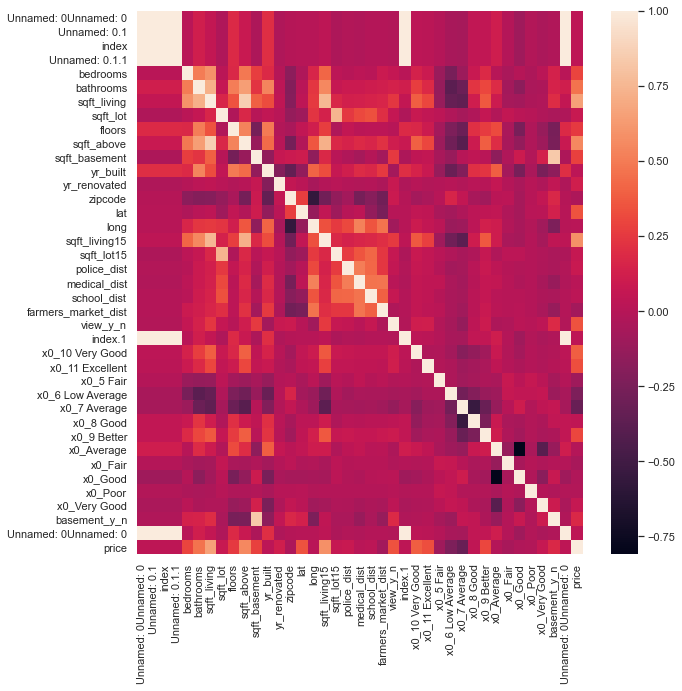

In [11]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df_train.corr())

### Observations

- tons of multicoliniarity ops.
- sqft_living has the highest correlation with price, followed by sqft_above and sqft_living15


In [13]:
price_corrs = df.corr()['price'].sort_values(ascending = False)
price_corrs

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

### Check values in categorical categories

Looking at waterfront, view, condition, and grade columns

In [14]:
# code from open hours
obj_cols = [c for c in df.columns if df[c].dtype =='object']
df[obj_cols].describe()

,date,waterfront,view,condition,grade,sqft_basement
count,21597,19221,21534,21597,21597,21597
unique,372,2,5,5,11,304
top,6/23/2014,NO,NONE,Average,7 Average,0.0
freq,142,19075,19422,14020,8974,12826


In [15]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

CONVERT TO BOOLEAN

In [16]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Can do the hot explode thing here
per column_names.md this descriptor comes from "Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other"


In [17]:
df['condition'].value_counts(0)

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

Per column_names.md 
"How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code"

In [18]:
df['grade'].value_counts().sort_index()

10 Very Good     1134
11 Excellent      399
12 Luxury          89
13 Mansion         13
3 Poor              1
4 Low              27
5 Fair            242
6 Low Average    2038
7 Average        8974
8 Good           6065
9 Better         2615
Name: grade, dtype: int64

Seems odd that they have a Luxury and a Mainson category - could be a source for outliers, may want to remove from df? 

Per column_names.md "Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code

In [19]:
## taking a look at luxury and mansion properties
# (titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]
df_fancy = df[(df.grade == '13 Mansion') | (df.grade =='12 Luxury')]
df_fancy.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.020000e+02,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,83.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.933945e+09,2.394755e+06,4.343137,4.161765,5734.441176,51427.176471,1.950980,4827.617647,1990.392157,120.156627,98050.470588,47.601396,-122.159647,3962.284314,37400.156863
std,2.621501e+09,1.260305e+06,0.917326,1.213908,1740.699379,102889.651427,0.447821,1386.069720,23.440321,477.471196,53.872917,0.079666,0.128182,924.914108,56646.113445
min,9.800015e+07,8.350000e+05,2.000000,2.500000,3690.000000,3452.000000,1.000000,2090.000000,1902.000000,0.000000,98004.000000,47.306900,-122.408000,1490.000000,2199.000000
25%,1.950059e+09,1.550000e+06,4.000000,3.312500,4490.000000,16504.000000,2.000000,3980.000000,1990.000000,0.000000,98006.000000,47.550800,-122.229500,3275.000000,13894.000000
50%,3.627495e+09,1.930000e+06,4.000000,3.875000,5125.000000,25870.500000,2.000000,4615.000000,1997.500000,0.000000,98033.500000,47.601900,-122.156500,4060.000000,20086.000000
75%,5.034650e+09,2.935000e+06,5.000000,4.750000,6775.000000,39808.000000,2.000000,5487.500000,2001.750000,0.000000,98074.000000,47.642575,-122.107500,4667.500000,35303.750000
max,9.831200e+09,7.700000e+06,8.000000,8.000000,13540.000000,920423.000000,3.500000,9410.000000,2010.000000,2009.000000,98199.000000,47.761500,-121.756000,6210.000000,411962.000000


Interestingly the big outliers (aka 33 bedrooms) are not included here so while the overall price values are higher there's not any obvious reason to dump these rows. 

<AxesSubplot:xlabel='grade', ylabel='count'>

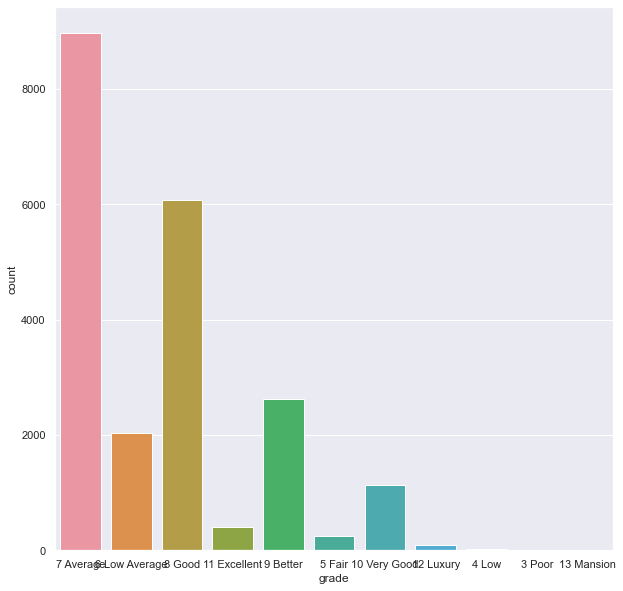

In [41]:
sns.countplot(x= 'grade', data = df)

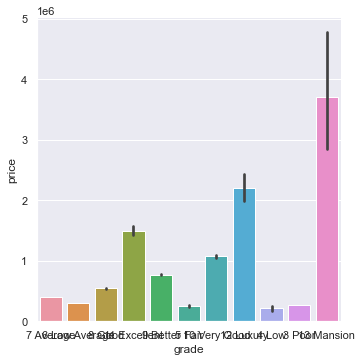

In [42]:
sns.catplot(x='grade', y='price', kind = 'bar', data = df)

KeyboardInterrupt: 

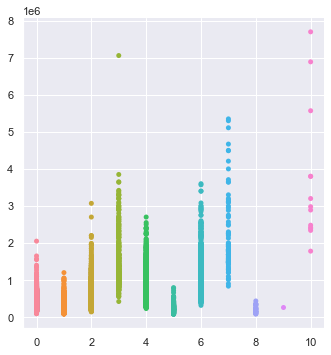

In [43]:
#note that the below code was too much for my pc

# sns.catplot(x='grade', y='price', kind = 'swarm', data = df)

### Visualizations

Used the OLS lab as a guide on the below

In [20]:
# move all the cat categories out so we can do this quickly

# df_num_cols = df.drop(['waterfront', 'view', 'condition', 'grade'], axis = 1)
# df_num_cols['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
# df_num_cols.info()

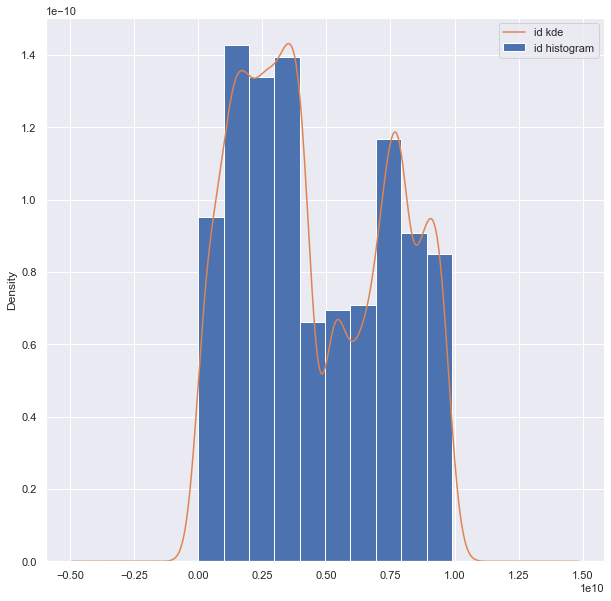

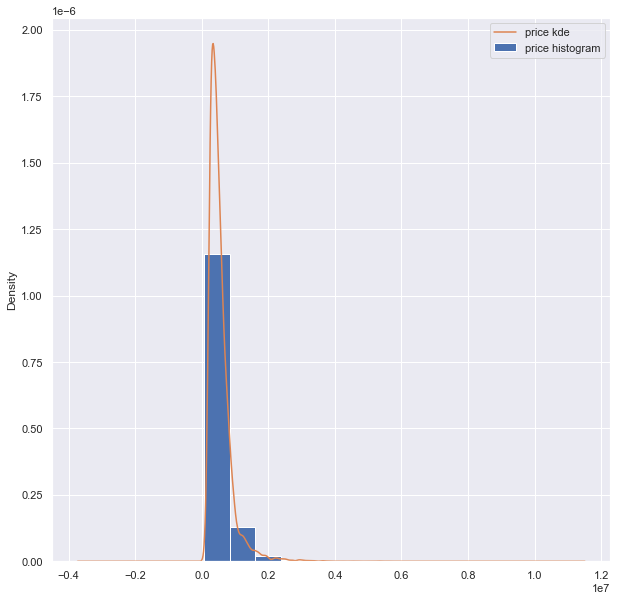

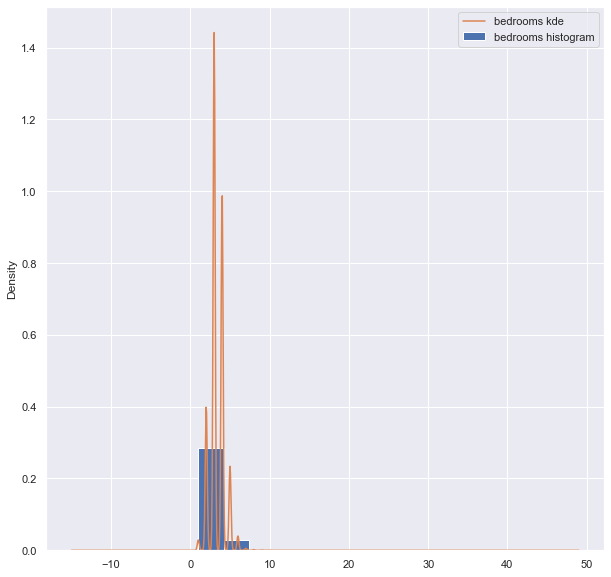

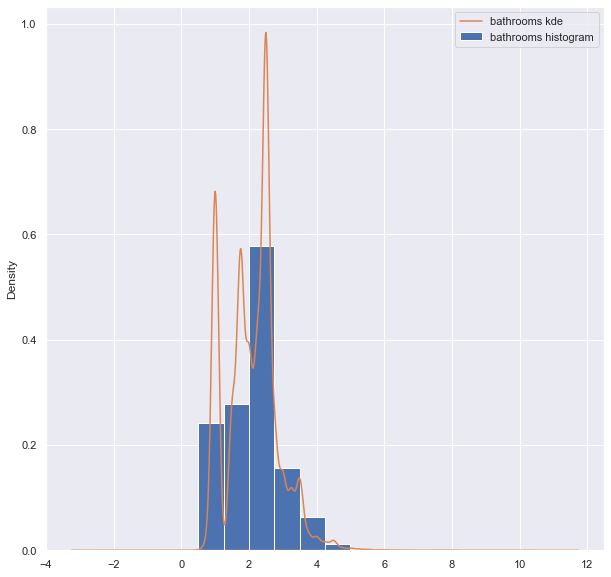

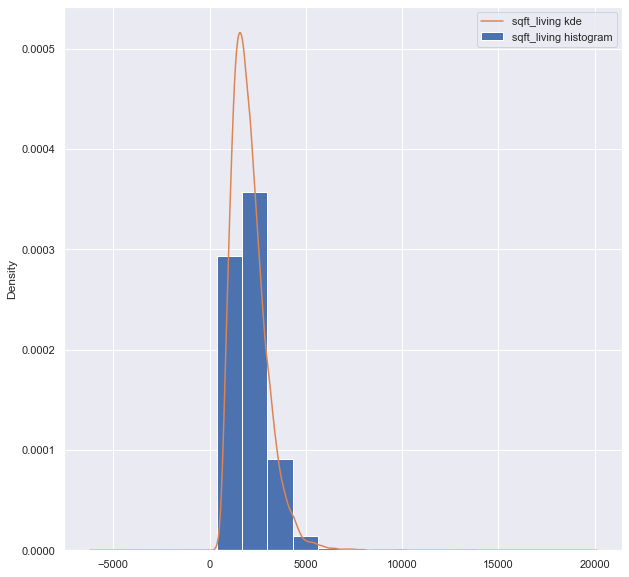

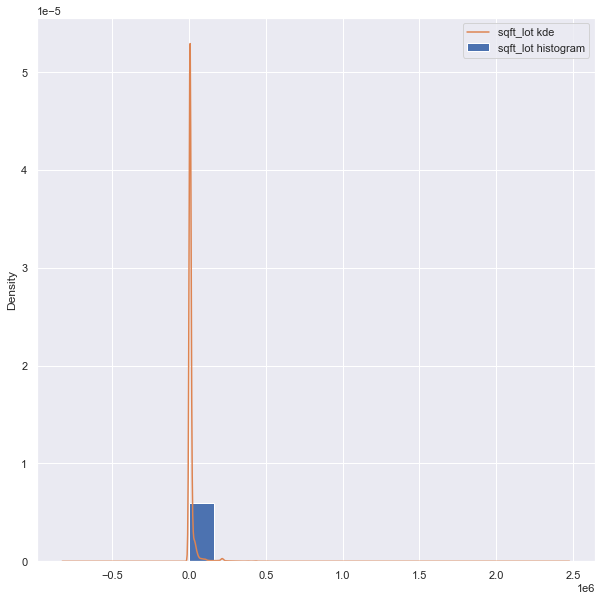

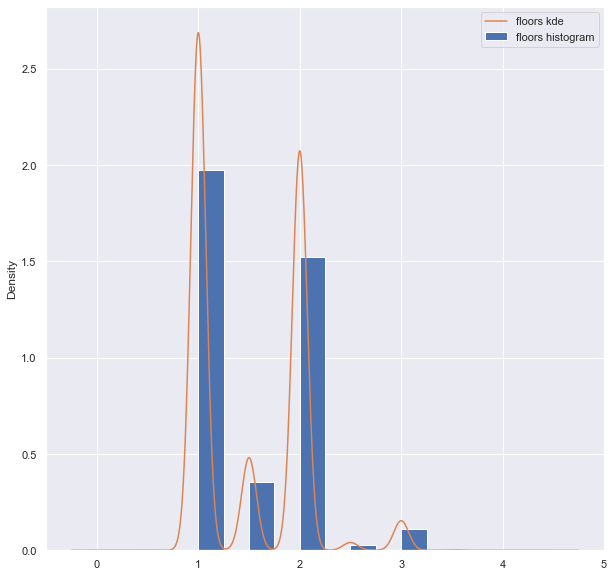

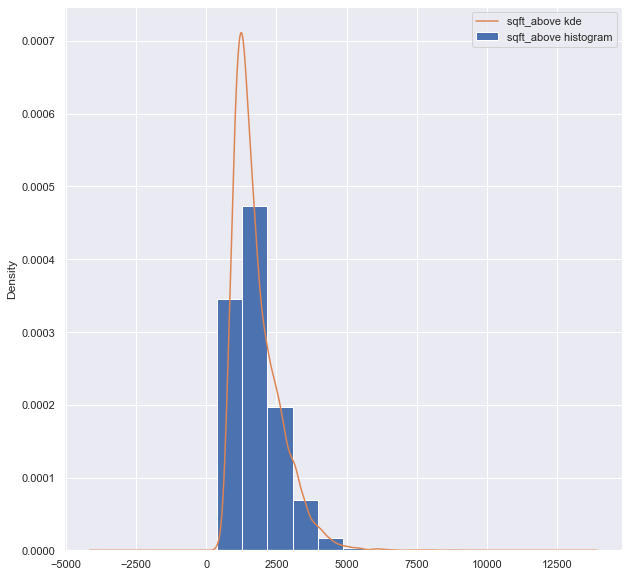

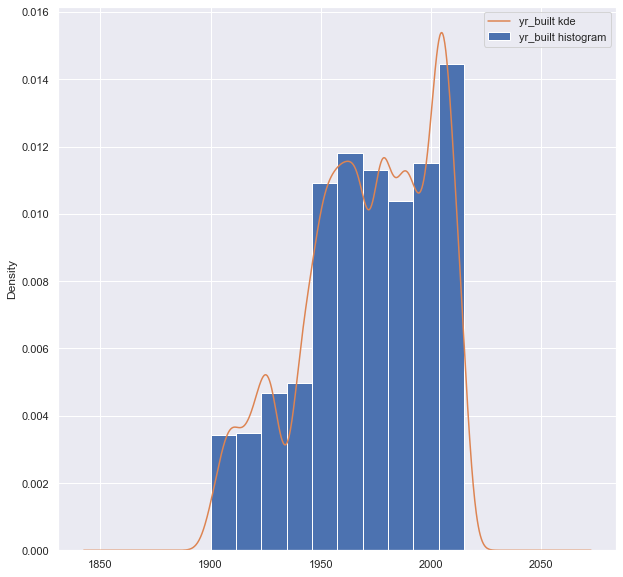

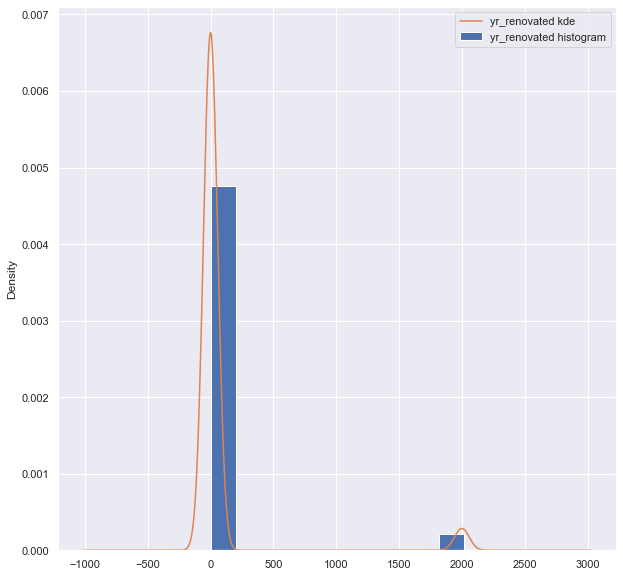

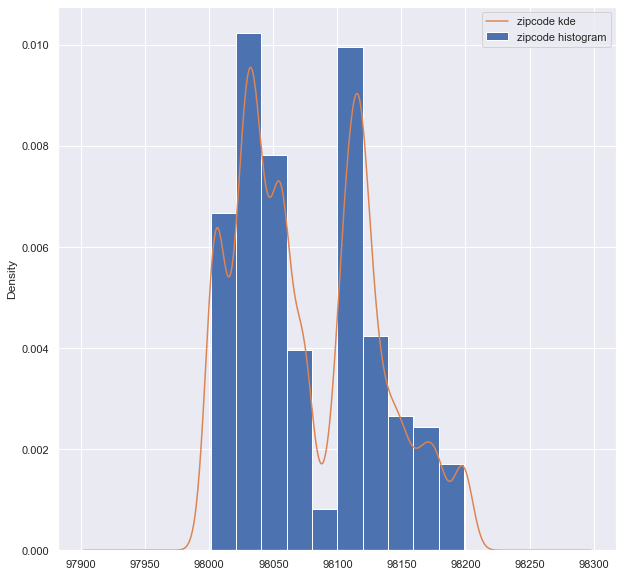

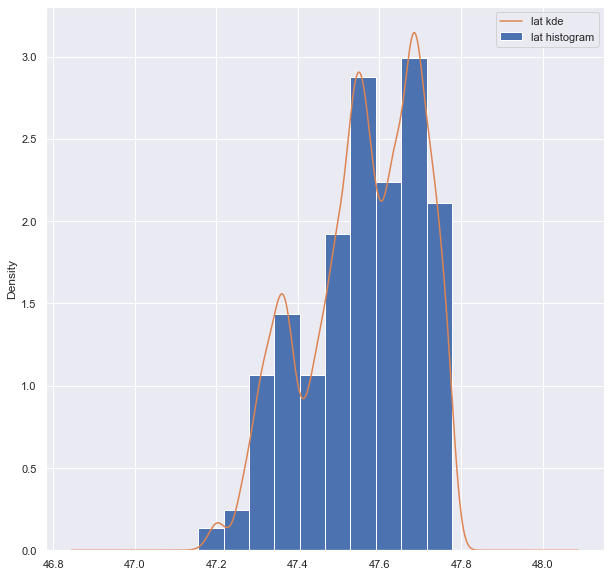

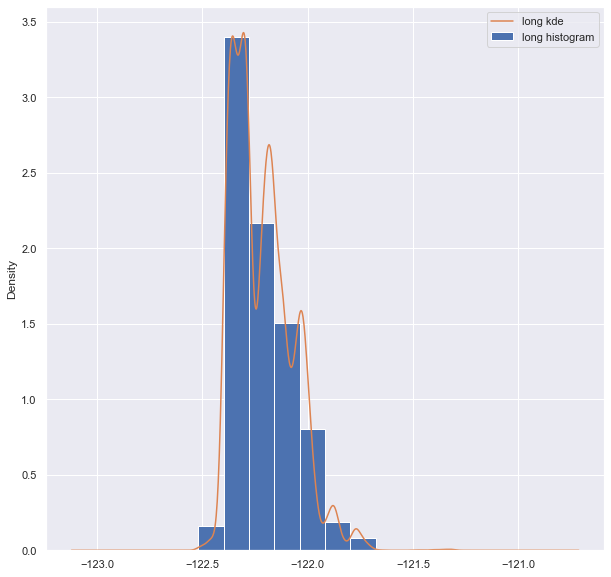

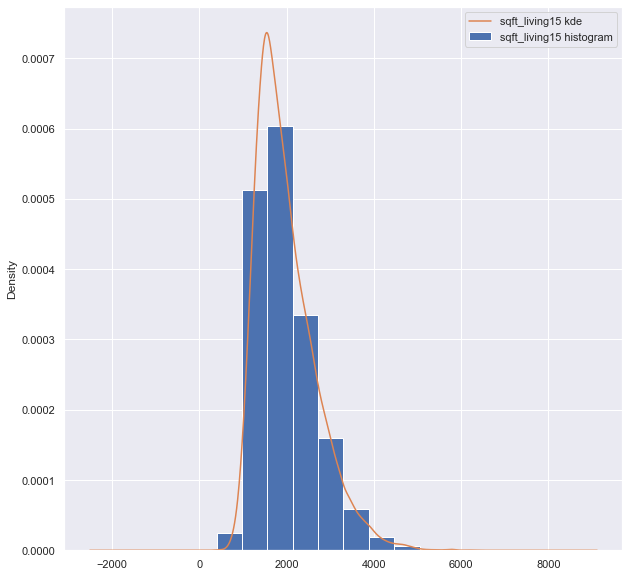

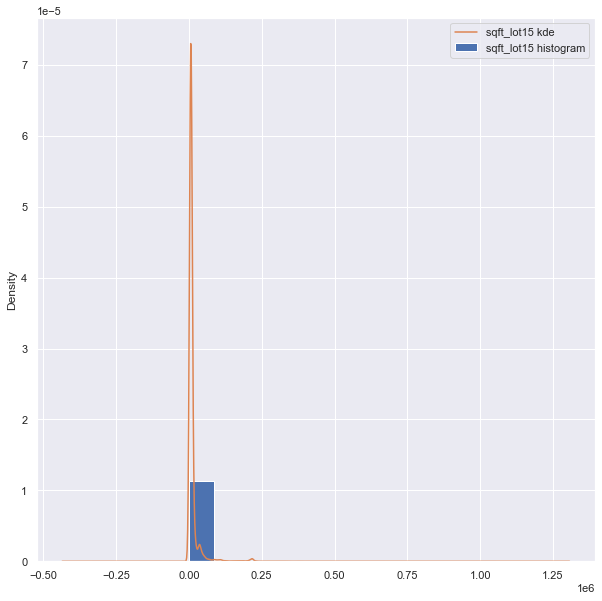

In [21]:
# For all the variables, check distribution by creating a histogram with kde
for column in df:
    if df.dtypes[column] != 'object':
        df[column].plot.hist(density=True, label = column+' histogram')
        df[column].plot.kde(label =column+' kde')
        plt.legend()
        plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0 bedrooms
1 bathrooms
2 sqft_living


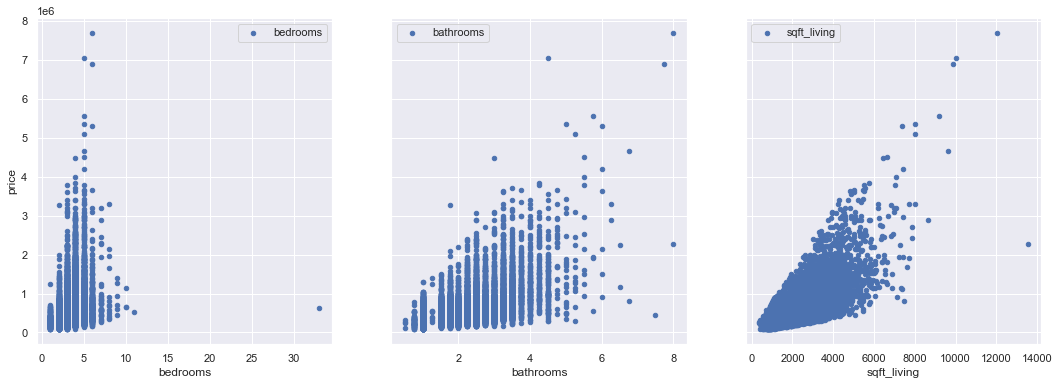

In [23]:
# visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living']):
    print(idx, channel)
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0 sqft_lot
1 floors
2 sqft_above


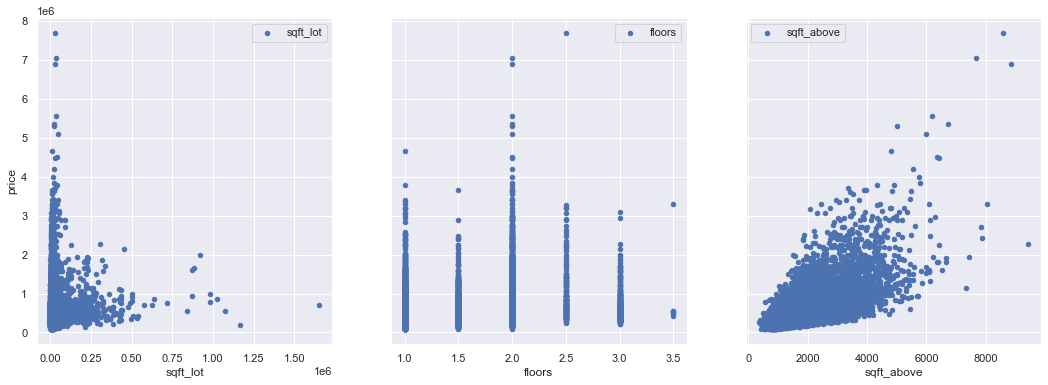

In [24]:

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_lot', 'floors', 'sqft_above']):
    print(idx, channel)
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0 yr_built
1 yr_renovated
2 zipcode


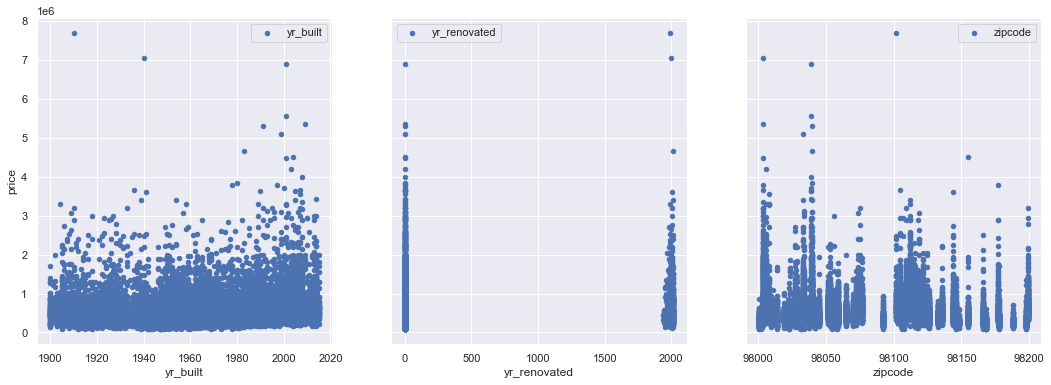

In [25]:

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['yr_built', 'yr_renovated', 'zipcode']):
    print(idx, channel)
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0 sqft_living15
1 sqft_lot15
2 dist


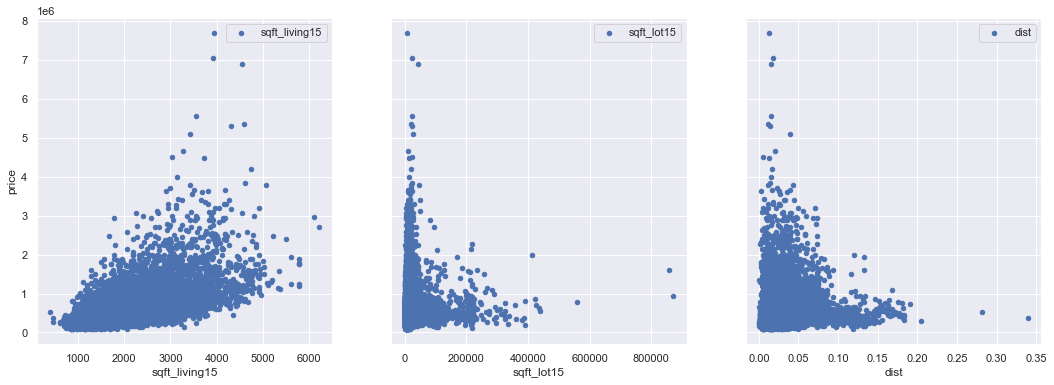

In [38]:

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_living15', 'sqft_lot15', 'dist']):
    print(idx, channel)
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [27]:
# code here to prepare your data

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

In [28]:
df_under_6k = df[df['sqft_living']<6000] 
df_under_6k

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [24]:
formula = 'price ~ sqft_living'

model = ols(formula = formula, data = df_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                 1.094e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:17:12   Log-Likelihood:            -2.0166e+05
No. Observations:               14637   AIC:                         4.033e+05
Df Residuals:                   14635   BIC:                         4.033e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.241e+04   5136.657      4.362      0.000    1.23e+04    3.25e+04
sqft_living   246.0200      2.352    104.593      0.000     241.409     250.630
==============================================================================
Omnibus:                     7262.815   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83354.602
Skew:                           2.110   Prob(JB):                         0.00
Kurtosis:                      13.903   Cond. No.                     5.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:30:10   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
formula = 'price ~ sqft_living + sqft_lot + sqft_above + basement_y_n + sqft_living15 + sqft_lot15'
model = ols(formula = formula, data = df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     2030.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:15:46   Log-Likelihood:            -2.0131e+05
No. Observations:               14637   AIC:                         4.026e+05
Df Residuals:                   14630   BIC:                         4.027e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.683e+04   6290.284    -10.624      0.000   -7.92e+04   -5.45e+04
sqft_living     166.9100      7.952     20.989      0.000     151.323     182.497
sqft_lot          0.0958      0.076      1.255      0.209      -0.054       0.245
sqft_above       13.2792      8.584      1.547      0.122      -3.546      30.105
basement_y_n   5.613e+04   6924.638      8.105      0.000    4.26e+04    6.97e+04
sqft_living15   108.2654      4.520     23.954      0.000      99.406     117.125
sqft_lot15       -0.7141      0.111     -6.440      0.000      -0.931      -0.497
==============================================================================
Omnibus:                     7296.441   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86622.475
Skew:                           2.110   Prob(JB):                         0.00
Kurtosis:                      14.145   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
formula = 'price ~ sqft_living + sqft_lot + sqft_above + sqft_living15 + sqft_lot15'
model = ols(formula = formula, data = df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     2413.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:12:04   Log-Likelihood:            -2.0135e+05
No. Observations:               14637   AIC:                         4.027e+05
Df Residuals:                   14631   BIC:                         4.027e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -5.12e+04   6000.823     -8.532      0.000    -6.3e+04   -3.94e+04
sqft_living     217.9498      4.867     44.781      0.000     208.410     227.490
sqft_lot          0.0879      0.076      1.150      0.250      -0.062       0.238
sqft_above      -43.3745      4.993     -8.686      0.000     -53.162     -33.587
sqft_living15   109.0540      4.529     24.081      0.000     100.177     117.931
sqft_lot15       -0.7327      0.111     -6.595      0.000      -0.951      -0.515
==============================================================================
Omnibus:                     7212.993   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83796.401
Skew:                           2.086   Prob(JB):                         0.00
Kurtosis:                      13.954   Cond. No.                     1.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14637 entries, 0 to 14636
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0Unnamed: 0  14637 non-null  int64  
 1   Unnamed: 0.1          14637 non-null  int64  
 2   index                 14637 non-null  int64  
 3   Unnamed: 0.1.1        14637 non-null  int64  
 4   date                  14637 non-null  object 
 5   bedrooms              14637 non-null  int64  
 6   bathrooms             14637 non-null  float64
 7   sqft_living           14637 non-null  int64  
 8   sqft_lot              14637 non-null  int64  
 9   floors                14637 non-null  float64
 10  condition             14637 non-null  object 
 11  sqft_above            14637 non-null  int64  
 12  sqft_basement         14637 non-null  float64
 13  yr_built              14637 non-null  int64  
 14  yr_renovated          14637 non-null  float64
 15  zipcode            

In [25]:
formula = 'price ~ sqft_living + police_dist'
model = ols(formula = formula, data = df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     5469.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:17:44   Log-Likelihood:            -2.0166e+05
No. Observations:               14637   AIC:                         4.033e+05
Df Residuals:                   14634   BIC:                         4.034e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.221e+04   5630.689      3.944      0.000    1.12e+04    3.32e+04
sqft_living   245.9944      2.371    103.736      0.000     241.346     250.643
police_dist  8006.7516   9.41e+04      0.085      0.932   -1.76e+05    1.92e+05
==============================================================================
Omnibus:                     7264.113   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83389.504
Skew:                           2.110   Prob(JB):                         0.00
Kurtosis:                      13.905   Cond. No.                     1.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
formula = 'price ~ sqft_living + bedrooms + bathrooms + floors'
model = ols(formula = formula, data = df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     2885.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:13:48   Log-Likelihood:            -2.0149e+05
No. Observations:               14637   AIC:                         4.030e+05
Df Residuals:                   14632   BIC:                         4.030e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.195e+05   9014.836     13.251      0.000    1.02e+05    1.37e+05
sqft_living   274.8403      3.623     75.852      0.000     267.738     281.943
bedrooms    -5.181e+04   2933.366    -17.662      0.000   -5.76e+04   -4.61e+04
bathrooms   -2747.8203   4323.805     -0.636      0.525   -1.12e+04    5727.382
floors       1.503e+04   4121.788      3.648      0.000    6955.158    2.31e+04
==============================================================================
Omnibus:                     7213.049   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82881.562
Skew:                           2.090   Prob(JB):                         0.00
Kurtosis:                      13.882   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
formula = 'price ~ sqft_living + bedrooms + bathrooms + floors'
model = ols(formula = formula, data = df_train).fit()
model.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           21597 non-null  int64  
 1   id                   21597 non-null  int64  
 2   date                 21597 non-null  object 
 3   price                21597 non-null  float64
 4   bedrooms             21597 non-null  int64  
 5   bathrooms            21597 non-null  float64
 6   sqft_living          21597 non-null  int64  
 7   sqft_lot             21597 non-null  int64  
 8   floors               21597 non-null  float64
 9   waterfront           19221 non-null  object 
 10  view                 21534 non-null  object 
 11  condition            21597 non-null  object 
 12  grade                21597 non-null  object 
 13  sqft_above           21597 non-null  int64  
 14  sqft_basement        21597 non-null  object 
 15  yr_built             21597 non-null 

In [22]:
formula = 'price ~ sqft_living + police_dist + medical_dist + school_dist + farmers_market_dist'
model = ols(formula = formula, data = df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     2535.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:16:14   Log-Likelihood:            -2.0118e+05
No. Observations:               14637   AIC:                         4.024e+05
Df Residuals:                   14631   BIC:                         4.024e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.292e+04   5637.679     11.160      0.000    5.19e+04     7.4e+04
sqft_living           256.6268      2.323    110.490      0.000     252.074     261.179
police_dist          8.175e+05   1.08e+05      7.542      0.000    6.05e+05    1.03e+06
medical_dist         -1.01e+05   7.61e+04     -1.327      0.185    -2.5e+05    4.82e+04
school_dist          -6.79e+05   2.61e+05     -2.605      0.009   -1.19e+06   -1.68e+05
farmers_market_dist -2.299e+06    8.7e+04    -26.429      0.000   -2.47e+06   -2.13e+06
==============================================================================
Omnibus:                     7426.612   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93458.648
Skew:                           2.139   Prob(JB):                         0.00
Kurtosis:                      14.616   Cond. No.                     3.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14637 entries, 0 to 14636
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0Unnamed: 0  14637 non-null  int64  
 1   Unnamed: 0.1          14637 non-null  int64  
 2   index                 14637 non-null  int64  
 3   Unnamed: 0.1.1        14637 non-null  int64  
 4   date                  14637 non-null  object 
 5   bedrooms              14637 non-null  int64  
 6   bathrooms             14637 non-null  float64
 7   sqft_living           14637 non-null  int64  
 8   sqft_lot              14637 non-null  int64  
 9   floors                14637 non-null  float64
 10  condition             14637 non-null  object 
 11  sqft_above            14637 non-null  int64  
 12  sqft_basement         14637 non-null  float64
 13  yr_built              14637 non-null  int64  
 14  yr_renovated          14637 non-null  float64
 15  zipcode            

In [28]:
formula = 'price ~ sqft_living + view_y_n'
model = ols(formula = formula, data = df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     6385.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:20:09   Log-Likelihood:            -2.0115e+05
No. Observations:               14637   AIC:                         4.023e+05
Df Residuals:                   14634   BIC:                         4.023e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.907e+04   4988.879      7.832      0.000    2.93e+04    4.89e+04
sqft_living   227.8728      2.340     97.364      0.000     223.285     232.460
view_y_n     2.117e+05   6539.354     32.371      0.000    1.99e+05    2.25e+05
==============================================================================
Omnibus:                     6659.621   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69626.091
Skew:                           1.916   Prob(JB):                         0.00
Kurtosis:                      12.974   Cond. No.                     7.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
X_cols = list(df_train.columns)
X_cols[-15:-3]

['x0_10VeryGood',
 'x0_11Excellent',
 'x0_5Fair',
 'x0_6LowAverage',
 'x0_7Average',
 'x0_8Good',
 'x0_9Better',
 'x0_Average',
 'x0_Fair',
 'x0_Good',
 'x0_Poor',
 'x0_VeryGood']

In [48]:
formula = 'price ~ '+'+'.join(X_cols[-15:-3])
model = ols(formula = formula, data = df_train).fit()
model.summary()

#Condition and grade both do stuff
# MAKE SURE WE SHOW CLEANING CODE 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1105.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:30:23   Log-Likelihood:            -2.0102e+05
No. Observations:               14637   AIC:                         4.021e+05
Df Residuals:                   14624   BIC:                         4.022e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.042e+16    7.1e+16      0.288      0.774   -1.19e+17     1.6e+17
x0_10VeryGood   4.401e+16   5.84e+16      0.754      0.451   -7.04e+16    1.58e+17
x0_11Excellent  4.401e+16   5.84e+16      0.754      0.451   -7.04e+16    1.58e+17
x0_5Fair        4.401e+16   5.84e+16      0.754      0.451   -7.04e+16    1.58e+17
x0_6LowAverage  4.401e+16   5.84e+16      0.754      0.451   -7.04e+16    1.58e+17
x0_7Average     4.401e+16   5.84e+16      0.754      0.451   -7.04e+16    1.58e+17
x0_8Good        4.401e+16   5.84e+16      0.754      0.451   -7.04e+16    1.58e+17
x0_9Better      4.401e+16   5.84e+16      0.754      0.451   -7.04e+16    1.58e+17
x0_Average     -6.443e+16   7.74e+16     -0.832      0.405   -2.16e+17    8.73e+16
x0_Fair        -6.443e+16   7.74e+16     -0.832      0.405   -2.16e+17    8.73e+16
x0_Good        -6.443e+16   7.74e+16     -0.832      0.405   -2.16e+17    8.73e+16
x0_Poor        -6.443e+16   7.74e+16     -0.832      0.405   -2.16e+17    8.73e+16
x0_VeryGood    -6.443e+16   7.74e+16     -0.832      0.405   -2.16e+17    8.73e+16
==============================================================================
Omnibus:                     7577.652   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97802.209
Skew:                           2.188   Prob(JB):                         0.00
Kurtosis:                      14.883   Cond. No.                     1.48e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [ ]:
# code here for your first 'substandard' model

In [ ]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
